In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns


In [2]:
disease_df = pd.read_csv("heartD.csv")
disease_df.drop(['education'], inplace = True, axis = 1)
disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)


In [3]:
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.TenYearCHD.value_counts())


   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

In [4]:
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay', 
                           'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

X = preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.3, random_state = 4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (2625, 6) (2625,)
Test set: (1126, 6) (1126,)


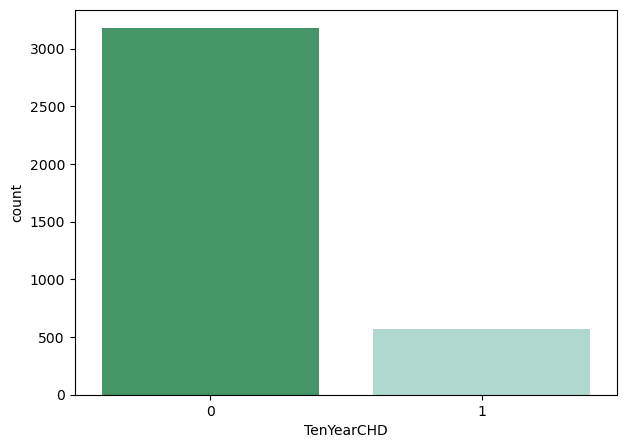

In [6]:
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=disease_df,
             palette="BuGn_r")
plt.show()


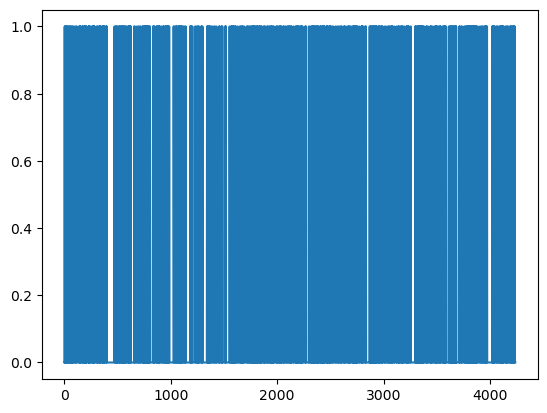

In [7]:
lasten = disease_df['TenYearCHD'].plot()
plt.show(lasten)


In [8]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


In [9]:
# Evaluation and accuracy
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =', 
      accuracy_score(y_test, y_pred))


Accuracy of the model is = 0.8490230905861457


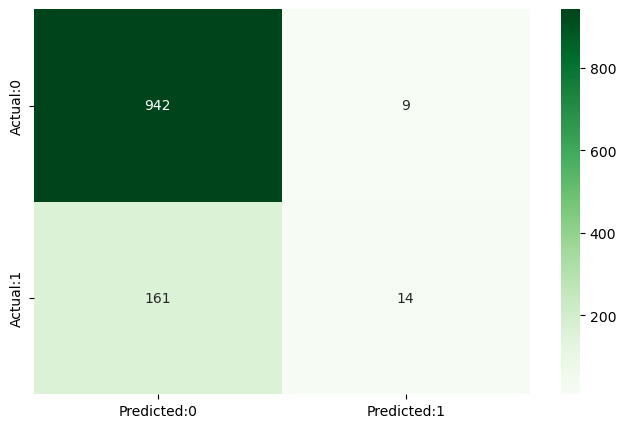

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



In [11]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))


In [32]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=4)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

In [33]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

Random Forest Classifier Accuracy: 0.8268974700399467


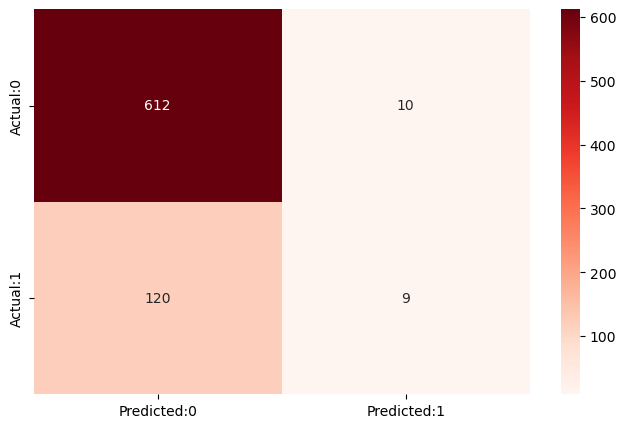

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       622
           1       0.47      0.07      0.12       129

    accuracy                           0.83       751
   macro avg       0.65      0.53      0.51       751
weighted avg       0.77      0.83      0.77       751



In [47]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_rf = pd.DataFrame(data = cm_rf, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix_rf, annot = True, fmt = 'd', cmap = "Reds")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred_rf))

In [40]:
#SVM
from sklearn.svm import SVC
svm_classifier = SVC(kernel='rbf', random_state=4)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

In [41]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

Accuracy: 0.833555259653795


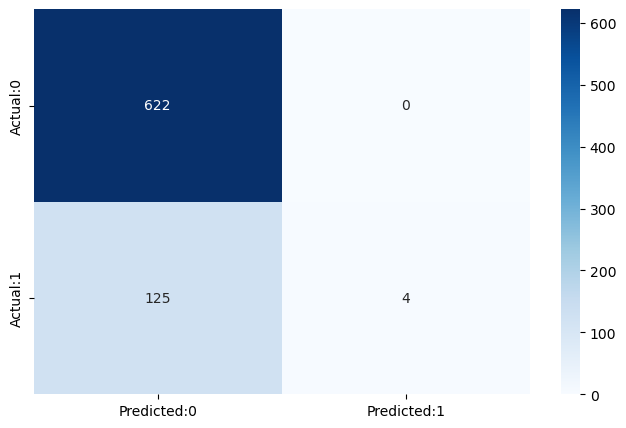

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       622
           1       1.00      0.03      0.06       129

    accuracy                           0.83       751
   macro avg       0.92      0.52      0.48       751
weighted avg       0.86      0.83      0.76       751



In [48]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
conf_matrix_svm = pd.DataFrame(data = cm_svm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix_svm, annot = True, fmt = 'd', cmap = "Blues")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred_svm))

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

In [26]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("k-NN Accuracy:", accuracy_knn)

k-NN Accuracy: 0.8135818908122503


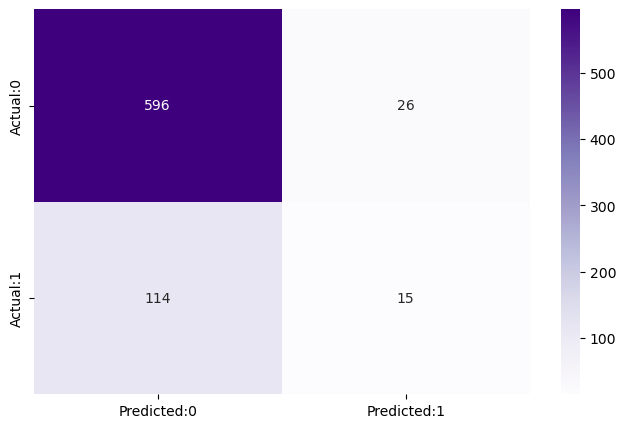

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.84      0.96      0.89       622
           1       0.37      0.12      0.18       129

    accuracy                           0.81       751
   macro avg       0.60      0.54      0.54       751
weighted avg       0.76      0.81      0.77       751



In [51]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_knn = pd.DataFrame(data = cm_knn, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix_knn, annot = True, fmt = 'd', cmap = "Purples")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred_knn))